Nama &nbsp; &nbsp;  : Daniel Morantha <br>
Kelas &nbsp; &nbsp; : Predict

## Problem Scoping

Dalam mencapai pembangunan kualitas hidup manusia Indonesia tidak terlepas dari program pembangunan yang dilaksanakan pemerintah di tiap wilayah Indonesia baik itu tingkat pusat maupun daerah. Selain itu Penentuan program pembangunan yang dilakasanakan harus tepat sasaran dan sesuai dengan prioritas daerah berdasarkan kategori IPM yang dimiliki daerah tersebut. Indonesia perlu adanya suatu sistem keputusan yang dapat menentukan klasifikasi kategori IPM secara cepat dan akurat.



## Data Acquisition

Memperoleh dataset dengan teknik pengumpulan data sekunder terdapat di link berikut https://bit.ly/Dataset-PraktikDS <br>
Model yang digunakan merupakan model untuk mengklasifikasi IPM berdasarkan: <br>

Variable Independen: <br>
-   `Harapan_Lama_Sekolah` dengan tipe data float (bilangan Desimal)
-   `Pengeluaran_Perkapita` dengan tipe data integer
-   `Rerata_Lama_Sekolah` dengan tipe data float
-   `Usia_Harapan_Hidup` dengan tipe data float

Variable Dependen: <br>
IPM <br>

Indeks Pembangunan Manusia (IPM) menurut Badan Pusat Statistik (BPS) dibagi 
menjadi 4 kategori atau golongan yaitu Indeks Pembangunan Manusia (IPM) 
-   `rendah` <60
-   `sedang` 60≤IPM<70
-   `tinggi` 70≤IPM<80
-   `Sangat tinggi` ≥80 (BPS:2014).
<br>

## Sekilas mengenai input model

Agar dapat mengklasifikasi IPM, data input model harus mengikuti format sebagai berikut:\
`[Harapan_Lama_Sekolah	Pengeluaran_Perkapita	Rerata_Lama_Sekolah	Usia_Harapan_Hidup]`

Sebagai contoh:\
Harapan_Lama_Sekolah: 14.36\
Pengeluaran_Perkapita: 9572\
Rerata_Lama_Sekolah: 9.37\
Usia_Harapan_Hidup: 69.96

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Eksplorasi Data

In [27]:
Data = pd.read_csv("IPM.csv")
Data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [28]:
Data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [29]:
Data.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


In [30]:
Data.shape

(2196, 5)

In [31]:
# Cek nilai null pda dataset
Data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [32]:
# Mengetahui info umum dari dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [33]:
Data.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [34]:
Data.nunique()

Harapan_Lama_Sekolah      499
Pengeluaran_Perkapita    1930
Rerata_Lama_Sekolah       633
Usia_Harapan_Hidup       1054
IPM                         4
dtype: int64

# Data Preprocessing

In [35]:
# Data.replace(to_replace=["Low", "Normal", "High", "Very-High"], value=[0,1,2,3], inplace=True)

In [36]:
X = Data.drop(['IPM'], axis=1)
X.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22


In [37]:
y = Data['IPM']
y.head()

0      High
1    Normal
2    Normal
3    Normal
4    Normal
Name: IPM, dtype: object

[0.14517919 0.36825259 0.27380003 0.21276819]


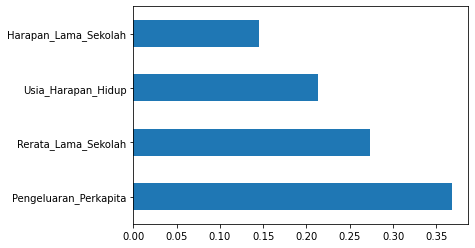

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model_ET = ExtraTreesClassifier()
model_ET.fit(X,y)

print(model_ET.feature_importances_)

kolom_penting = pd.Series(model_ET.feature_importances_, index=X.columns)
kolom_penting.nlargest(4).plot(kind='barh')
plt.show()

## Matriks Korelasi dengan Heatmap

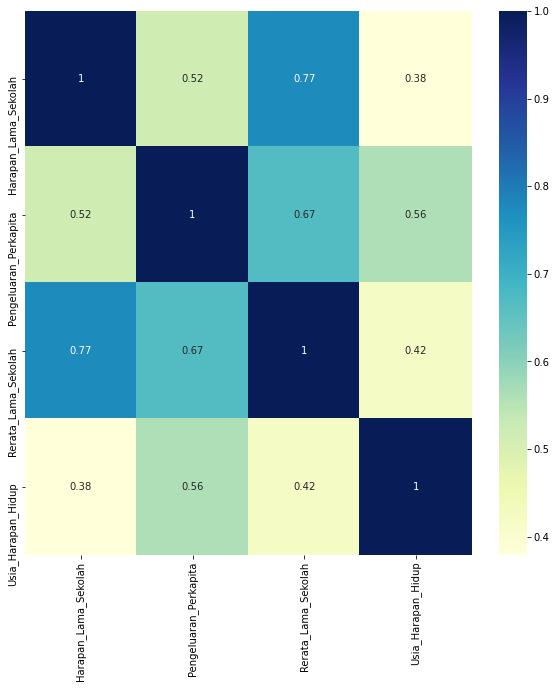

In [39]:
KorelasMat = Data.corr()
KolomTeratasKorelasi = KorelasMat.index
plt.figure(figsize=(10,10))

Diagram = sns.heatmap(Data[KolomTeratasKorelasi].corr(), annot=True, cmap="YlGnBu")

### Matriks Korelasi dengan Heatmap (Penjelasan)
---


* Pada heatmap di atas terlihat baris terakhir korelasi antara IPM dengan fitur lain dimana ada relasi kuat dengan variabel Usia_Harapan_Hidup, Pengeluaran_Perkapita, dan diikuti oleh var Rerata_Lama_Sekolah dan Harapan_Lama_Sekolah.


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1537, 4) (1537,)
(659, 4) (659,)


## Modeling

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
klasifikasi_LR = LogisticRegression()
klasifikasi_LR.fit(X_train, y_train)
y_pred_LR = klasifikasi_LR.predict(X_test)
skor_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("Akurasi Logistic Regression = ",skor_LR)

Akurasi Logistic Regression =  0.7754172989377845


## K-NN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 7, metric='minkowski', p=1)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
skor_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Akurasi KNN:", skor_knn)

Akurasi KNN: 0.8163884673748103


Text(0.5, 33.0, 'Prediksi')

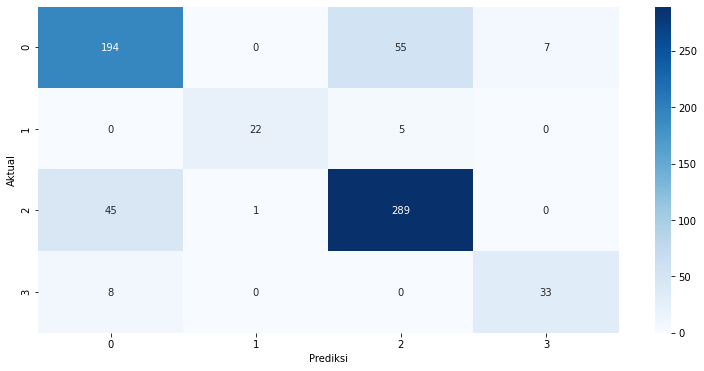

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(13,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')

## AdaBoostClassifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

klasifi_ab = AdaBoostClassifier(n_estimators=10, learning_rate=1)
klasifi_ab.fit(X_train, y_train)
y_pred_ab = klasifi_ab.predict(X_test)
skor_ab = metrics.accuracy_score(y_test, y_pred_ab)
print("Akurasi AdaBoostClassifier: ", skor_ab)

Akurasi AdaBoostClassifier:  0.7708649468892261


## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
skor_DT = metrics.accuracy_score(y_test, y_pred_DT)
print("Akurasi DT: ", skor_DT*100,"%")

Akurasi DT:  95.90288315629742 %


## Confusion matrik dengan metode DecisionTree

Text(0.5, 33.0, 'Prediksi')

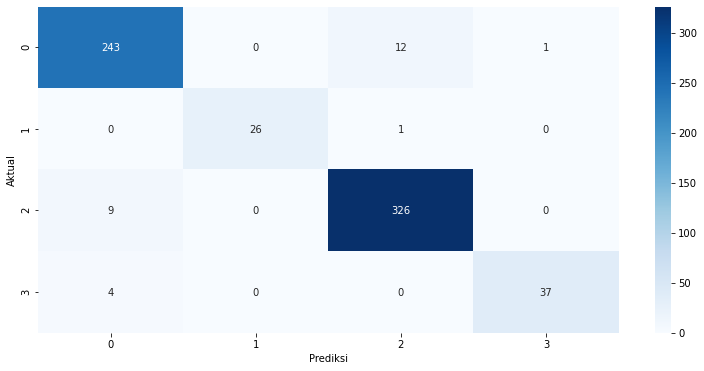

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(13,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')

## Evaluasi Model

In [48]:
print("Akurasi Logistic Regression = ",skor_LR*100,"%")
print("Akurasi KNN                 = ", skor_knn*100,"%")
print("Akurasi AdaBoostClassifier  = ", skor_ab*100,"%")
print("Akurasi DT                  = ", skor_DT*100,"%")

Akurasi Logistic Regression =  77.54172989377845 %
Akurasi KNN                 =  81.63884673748103 %
Akurasi AdaBoostClassifier  =  77.08649468892261 %
Akurasi DT                  =  95.90288315629742 %


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

        High       0.95      0.95      0.95       256
         Low       1.00      0.96      0.98        27
      Normal       0.96      0.97      0.97       335
   Very-High       0.97      0.90      0.94        41

    accuracy                           0.96       659
   macro avg       0.97      0.95      0.96       659
weighted avg       0.96      0.96      0.96       659



## Deployment

### Menyimpan model untuk di deploy

In [50]:
# import pickle

# pickle.dump(DT,open('model-DT-DanielMorantha.pkl','wb'))

model yang di deploy https://ipm-danielmorantha.herokuapp.com/